In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Hp 840 G5\Desktop\ML\streamlit_prac\nba2k-full.csv')
df

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,#3,Oklahoma City Thunder,G,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,#3,Washington Wizards,G,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,#27,Utah Jazz,C,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,#7,Toronto Raptors,G,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,USA,2006,1,24,Villanova,NBA2k21


In [3]:
df.shape

(464, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [5]:
df=df.dropna()

In [6]:
df.isnull().sum().sum()

0

In [7]:
df=df.drop(['full_name', 'b_day', 'height', 'weight', 'college', 'version'], axis=1)

In [8]:
def removehash(value):
    value=value[1:]
    return int(value)
df['jersey']=df['jersey'].apply(removehash)

In [9]:
df['salary']=df['salary'].apply(removehash)

In [10]:
df['country'].value_counts()

country
USA                   315
Canada                 15
Australia               8
Cameroon                5
Nigeria                 3
The Bahamas             2
Ukraine                 2
Mali                    1
Egypt                   1
Haiti                   1
Angola                  1
Germany                 1
Italy                   1
United Kingdom          1
Japan                   1
Israel                  1
Austria                 1
Senegal                 1
Puerto Rico             1
Philippines             1
Lithuania               1
New Zealand             1
Finland                 1
Dominican Republic      1
Montenegro              1
Greece                  1
Name: count, dtype: int64

In [11]:
def removecountryoutliers(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value
df['country']=df['country'].apply(removecountryoutliers)
df['country'].value_counts()

country
USA          315
Others        31
Canada        15
Australia      8
Name: count, dtype: int64

In [12]:
df['position'].value_counts()

position
G      166
F      123
C       31
F-C     26
G-F     11
F-G      7
C-F      5
Name: count, dtype: int64

In [13]:
df['draft_round'].value_counts()

draft_round
1            239
2             78
Undrafted     52
Name: count, dtype: int64

In [14]:
df['draft_peak'].value_counts()

draft_peak
Undrafted    52
2            15
3            14
1            14
9            13
4            12
7            11
11           11
6            10
12            9
10            9
13            9
14            8
8             8
15            8
5             8
22            7
19            7
24            7
30            7
46            7
20            6
23            6
27            6
33            6
40            5
26            5
21            5
28            5
38            5
29            4
16            4
34            4
17            4
42            4
18            4
35            4
47            4
58            3
50            3
41            3
25            3
37            3
32            3
45            3
44            2
39            2
36            2
55            2
43            2
49            2
31            2
48            2
51            2
52            1
54            1
60            1
Name: count, dtype: int64

In [15]:
def removeundrafted(value):
    if value=='Undrafted':
        return
    else:
        return value
df['draft_round']=df['draft_round'].apply(removeundrafted)
df['draft_peak']=df['draft_peak'].apply(removeundrafted)

In [16]:
df=df.dropna()

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['position']=le.fit_transform(df['position'])
df['country']=le.fit_transform(df['country'])
df['team']=le.fit_transform(df['team'])

In [18]:
df.describe()

,rating,jersey,team,position,salary,country,draft_year
count,317.000000,317.000000,317.000000,317.000000,3.170000e+02,317.000000,317.000000
mean,78.337539,13.839117,14.665615,3.362776,1.145762e+07,2.782334,2014.066246
std,6.820688,14.861682,8.431886,1.742326,1.178645e+07,0.589950,3.915891
min,68.000000,0.000000,0.000000,0.000000,7.956800e+04,0.000000,2003.000000
25%,73.000000,3.000000,8.000000,2.000000,2.351838e+06,3.000000,2011.000000
50%,77.000000,10.000000,15.000000,3.000000,6.500000e+06,3.000000,2015.000000
75%,82.000000,22.000000,22.000000,5.000000,1.564375e+07,3.000000,2017.000000
max,97.000000,99.000000,29.000000,6.000000,4.578097e+07,3.000000,2019.000000


In [19]:
x=df.drop(['salary'], axis=1)

In [20]:
y=df['salary']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=10, test_size=0.2)

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
prediction=lr.predict(x_test)

In [24]:
dif=y_test-prediction
dif

456    1.151829e+07
423    2.055033e+06
269    2.523294e+05
217   -2.387665e+06
80    -1.173612e+07
           ...     
438    2.378079e+06
190   -6.068261e+06
73    -6.383151e+06
154    4.152852e+06
44     3.261000e+06
Name: salary, Length: 64, dtype: float64

C:\Users\Hp 840 G5\AppData\Local\Temp\ipykernel_8040\243247392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dif)


<Axes: xlabel='salary', ylabel='Density'>

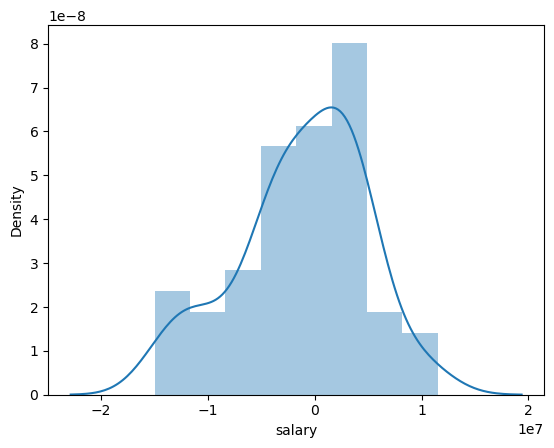

In [25]:
import seaborn as sns
sns.distplot(dif)

In [28]:
import joblib
joblib.dump(lr,'C:/Users/Hp 840 G5/Desktop/ML/streamlit_prac/updatedmodel.csv')


['C:/Users/Hp 840 G5/Desktop/ML/streamlit_prac/updatedmodel.csv']